       age  d18O
0 -16.5010 -9.50
1   0.0000 -9.66
2  19.9980 -9.58
3  38.2475 -9.50
4  56.4970 -9.33
641264.4
-16.501
          age       pre
800       0.0  0.016280
799    1000.0  0.017116
798    2000.0  0.016308
797    3000.0  0.014018
796    4000.0  0.010453
..        ...       ...
4    796000.0  0.015048
3    797000.0  0.016748
2    798000.0  0.016591
1    799000.0  0.014713
0    800000.0  0.011391

[801 rows x 2 columns]


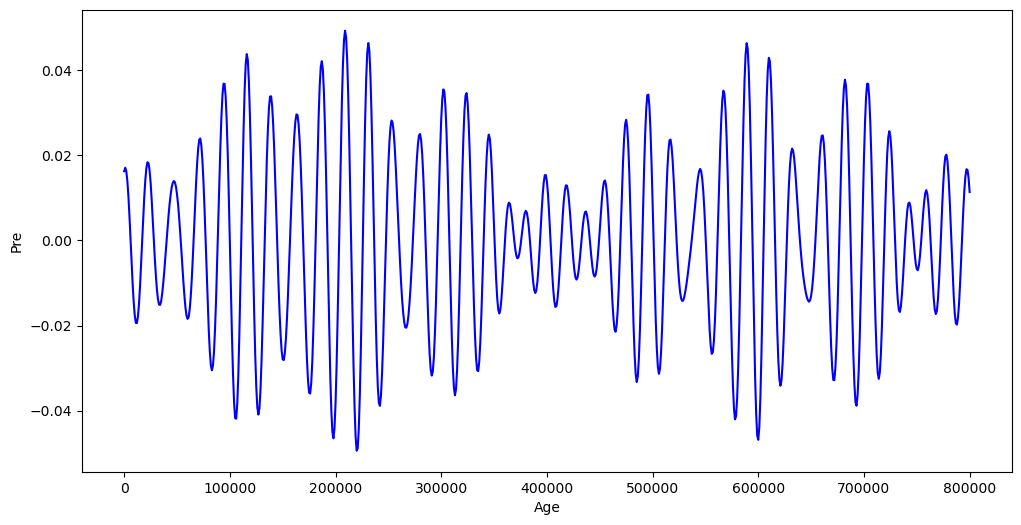

          age       obl
800       0.0  0.409093
799    1000.0  0.411353
798    2000.0  0.413555
797    3000.0  0.415639
796    4000.0  0.417555
..        ...       ...
4    796000.0  0.409597
3    797000.0  0.408234
2    798000.0  0.406853
1    799000.0  0.405493
0    800000.0  0.404191

[801 rows x 2 columns]


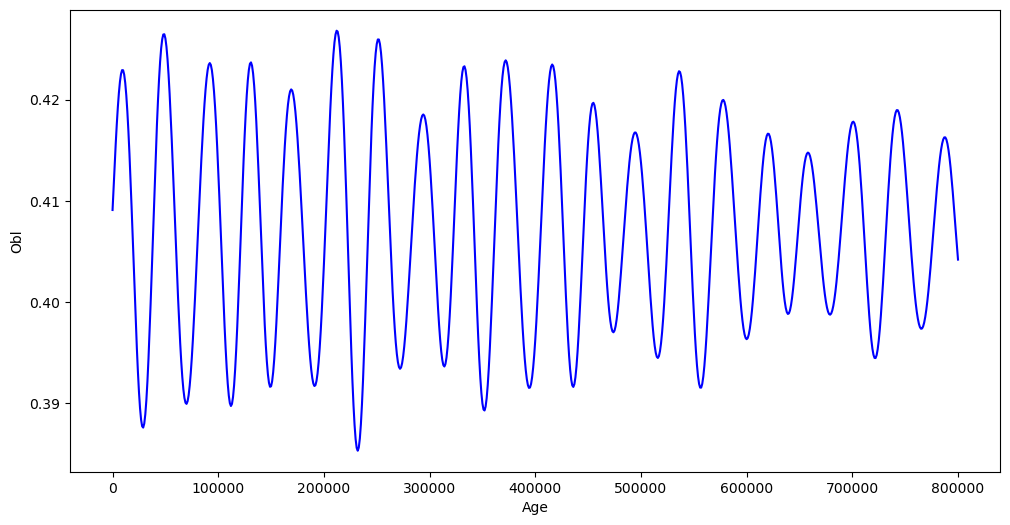

        age       pre
800     0.0  0.016280
799  1000.0  0.017116
798  2000.0  0.016308
797  3000.0  0.014018
796  4000.0  0.010453
        age       obl
800     0.0  0.409093
799  1000.0  0.411353
798  2000.0  0.413555
797  3000.0  0.415639
796  4000.0  0.417555


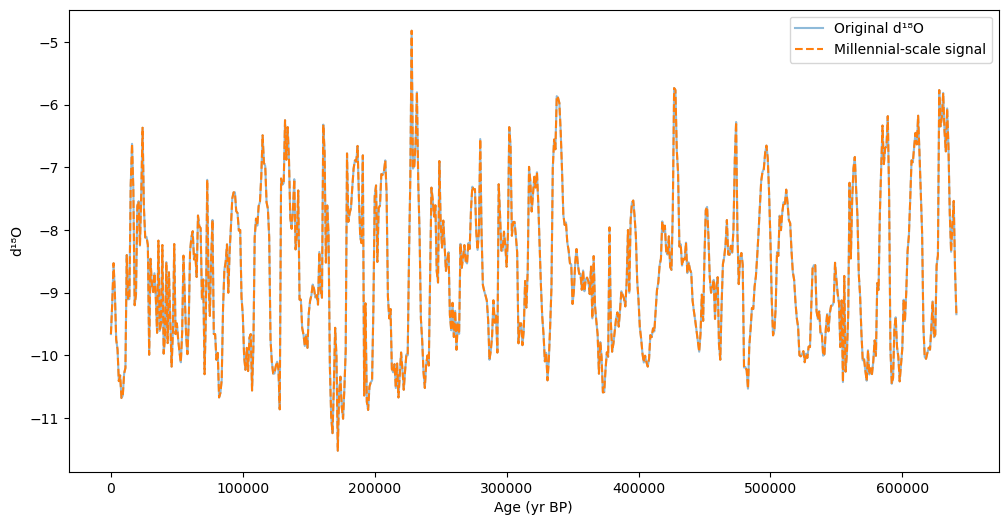

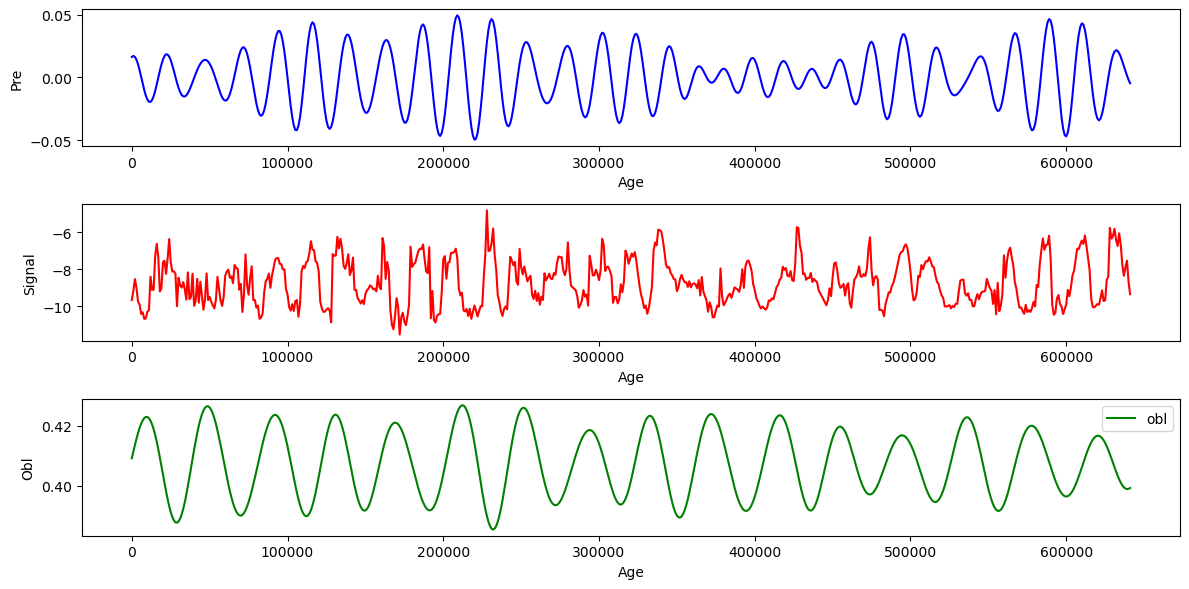

        age       pre
0  641000.0  0.016280
1  640000.0  0.017116
2  639000.0  0.016308
3  638000.0  0.014018
4  637000.0  0.010453


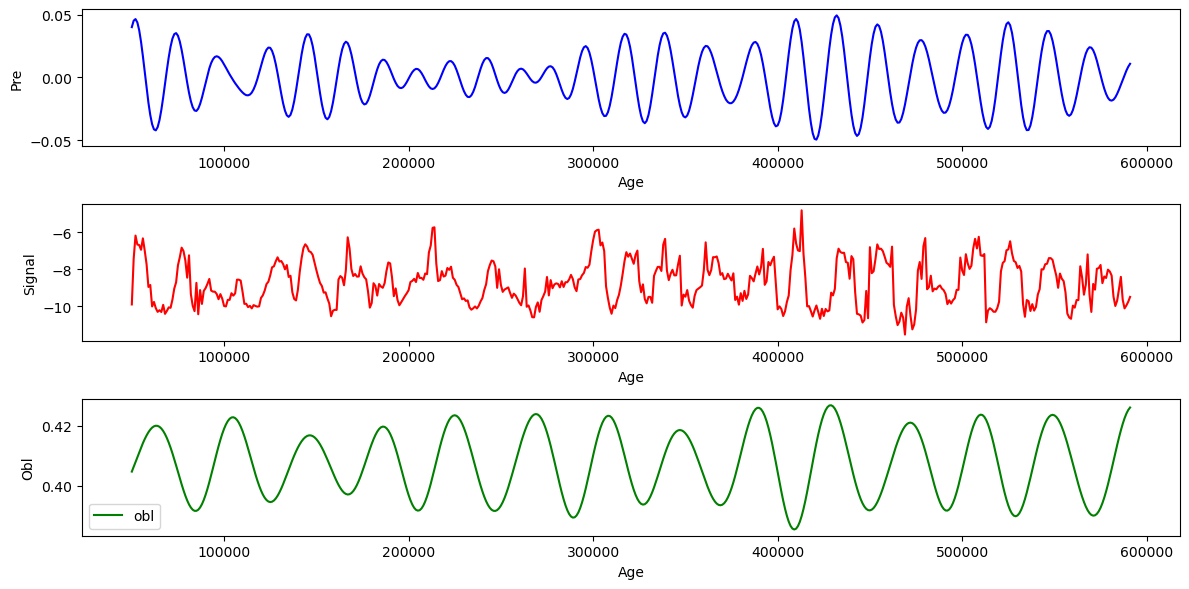

542
542


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# path to your file
file_path = r"D:\VScode\bipolar_seesaw_CCM\other_data\monsoon.xlsx"

# read the first sheet into a DataFrame
df = pd.read_excel(file_path)
# age =age *1000
df['age'] = df['age'] * 1000

print(df.head())
# print the age max and min
print(df['age'].max())
print(df['age'].min())



import pandas as pd
from scipy.interpolate import interp1d

# Read the file into a DataFrame
df_pre = pd.read_csv(
    r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre_800.txt", 
    sep='\s+',       # '\s+' means "split on any whitespace"
    header=None,     # or specify a row number if there's a header
    engine='python'
)

df_obl = pd.read_csv(
    r"D:\VScode\bipolar_seesaw_CCM\inso_data\obl_800.txt", 
    sep='\s+',       # '\s+' means "split on any whitespace"
    header=None,     # or specify a row number if there's a header
    engine='python'
)


# # Read the file into a DataFrame
# df_pre = pd.read_csv(
#     r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre_800_inter100.txt", 
#     sep='\s+',       # '\s+' means "split on any whitespace"
#     header=None,     # or specify a row number if there's a header
#     engine='python'
# )

# df_obl = pd.read_csv(
#     r"D:\VScode\bipolar_seesaw_CCM\inso_data\obl_800_inter100.txt", 
#     sep='\s+',       # '\s+' means "split on any whitespace"
#     header=None,     # or specify a row number if there's a header
#     engine='python'
# )

df_pre.iloc[:, 0] = df_pre.iloc[:, 0].abs() * 1000
df_obl.iloc[:, 0] = df_obl.iloc[:, 0].abs() * 1000

# Reverse the DataFrame rows
df_pre = df_pre.iloc[::-1]
df_pre.columns = ['age', 'pre']

df_obl = df_obl.iloc[::-1]
df_obl.columns = ['age', 'obl']

# plot df_pre
plt.figure(figsize=(12, 6))
plt.plot(df_pre.iloc[:, 0], df_pre.iloc[:, 1], label='pre', color='blue')
plt.xlabel("Age")
plt.ylabel("Pre")
print(df_pre)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_obl.iloc[:, 0], df_obl.iloc[:, 1], label='obl', color='blue')
plt.xlabel("Age")
plt.ylabel("Obl")
print(df_obl)
plt.show()


# crop the df_pre between Start age:  9540 End age:  122280
df_pre = df_pre[(df_pre['age'] >= 0) & (df_pre['age'] <= 641200)]
df_obl = df_obl[(df_obl['age'] >= 0) & (df_obl['age'] <= 641200)]

print(df_pre.head())
print(df_obl.head())

# # build an interpolator; use 'nearest' to preserve the step
f = interp1d(df['age'], df['d18O'], kind='nearest',
             bounds_error=False,
             fill_value=1)            

interpolated_sq = f(df_pre['age'].values)



df=pd.DataFrame({'age':df_pre['age'].values,'d18O':interpolated_sq})
df_sd=df.copy()

# window = int(10000 / np.median(np.diff(df["age"])))
# df["smoothed"] = df["d18O"].rolling(window=window, center=True, min_periods=1).mean()

# # 3) Millennial‐scale signal = original minus low‐frequency
# df_sd["d18O"] = df["d18O"] - df["smoothed"]

# df_sd["d18O"] = df_sd["d18O"].rolling(window=50, center=True, min_periods=1).mean()



# reset index of df_sd and df_pre according to the sorted age
df_sd = df_sd.sort_values(by='age').reset_index(drop=True)
df_pre = df_pre.sort_values(by='age').reset_index(drop=True)
df_obl = df_obl.sort_values(by='age').reset_index(drop=True)

# 4) Plot to check
plt.figure(figsize=(12, 6))
plt.plot(df["age"], df["d18O"],       label="Original d¹⁸O",   alpha=0.5)
# plt.plot(df["age"], df["smoothed"],   label=f"{8000} yr rolling mean", linewidth=2)
plt.plot(df["age"], df["d18O"],     label="Millennial‐scale signal", linestyle="--")
# plt.gca().invert_xaxis()  # if age is “years before present”
plt.xlabel("Age (yr BP)")
plt.ylabel("d¹⁸O")
plt.legend()
plt.show()


# plot df_pre and df_sd in 2 by 1 subplots
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(df_pre.iloc[:, 0], df_pre.iloc[:, 1], label='pre', color='blue')
plt.xlabel("Age")
plt.ylabel("Pre")
plt.subplot(3, 1, 2)
plt.plot(df_sd['age'], df_sd['d18O'], label='signal', color='red')
plt.xlabel("Age")
plt.ylabel("Signal")
plt.subplot(3, 1, 3)
plt.plot(df_obl['age'], df_obl['obl'], label='obl', color='green')
plt.xlabel("Age")
plt.ylabel("Obl")
plt.legend()
plt.tight_layout()
plt.show()




df_pre['age']=df_pre['age'].values * -1 +641000
df_sd['age']=df_sd['age'].values * -1 +641000
df_obl['age']=df_obl['age'].values * -1 +641000

print(df_pre.head())

# flip the two dfs upside down
df_pre = df_pre.iloc[::-1]
df_sd = df_sd.iloc[::-1]
df_obl = df_obl.iloc[::-1]

# reset index 
df_sd = df_sd.reset_index(drop=True)
df_pre = df_pre.reset_index(drop=True)
df_obl = df_obl.reset_index(drop=True)

# crop the first and last 50 rows of df_pre, df_obl and df_sd 
df_pre = df_pre.iloc[50:-50]
df_obl = df_obl.iloc[50:-50]
df_sd = df_sd.iloc[50:-50]

# plot df_pre and df_sd in 2 by 1 subplots
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(df_pre.iloc[:, 0], df_pre.iloc[:, 1], label='pre', color='blue')
plt.xlabel("Age")
plt.ylabel("Pre")
plt.subplot(3, 1, 2)
plt.plot(df_sd['age'], df_sd['d18O'], label='signal', color='red')
plt.xlabel("Age")
plt.ylabel("Signal")
plt.subplot(3, 1, 3)
plt.plot(df_obl['age'], df_obl['obl'], label='obl', color='green')
plt.xlabel("Age")
plt.ylabel("Obl")
plt.legend()
plt.tight_layout()
plt.show()

# print the length of df
print(len(df_pre))
print(len(df_sd))








In [3]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. Sort by time so the embedding respects chronology
df_sorted = df_sd.sort_values('age')
series   = df_sorted['d18O'].values
ages     = df_sorted['age'].values

# 2. Embedding parameters
E    = 3
taus = [1, 3, 5, 7, 9, 11]

# 3. Create a 2×3 subplot with 3D scenes
fig = make_subplots(
    rows=2, cols=3,
    specs=[[{'type': 'scene'}]*3,
           [{'type': 'scene'}]*3],
    subplot_titles=[f'τ = {τ}' for τ in taus]
)

# 4. Build each embedding and add as a line trace
for idx, τ in enumerate(taus):
    # Compute Takens embedding for this τ
    N = len(series) - (E - 1)*τ
    X = np.column_stack([series[j*τ : j*τ + N] for j in range(E)])
    
    # Determine subplot location
    row = idx//3 + 1
    col = idx%3  + 1
    
    fig.add_trace(
        go.Scatter3d(
            x=X[:,0], 
            y=X[:,1], 
            z=X[:,2],
            mode='lines',
            line=dict(width=2),
            name=f'τ={τ}',
            showlegend=False
        ),
        row=row, col=col
    )
    # Set axis titles for this scene
    scene_id = f'scene{idx+1}'
    fig.layout[scene_id].update(
        xaxis_title='x(t)',
        yaxis_title=f'x(t+{τ})',
        zaxis_title=f'x(t+{2*τ})',
    )

# 5. Layout tweaks
fig.update_layout(
    height=800, width=1200,
    title_text="Shadow Manifolds of d18O (E=3)",
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()


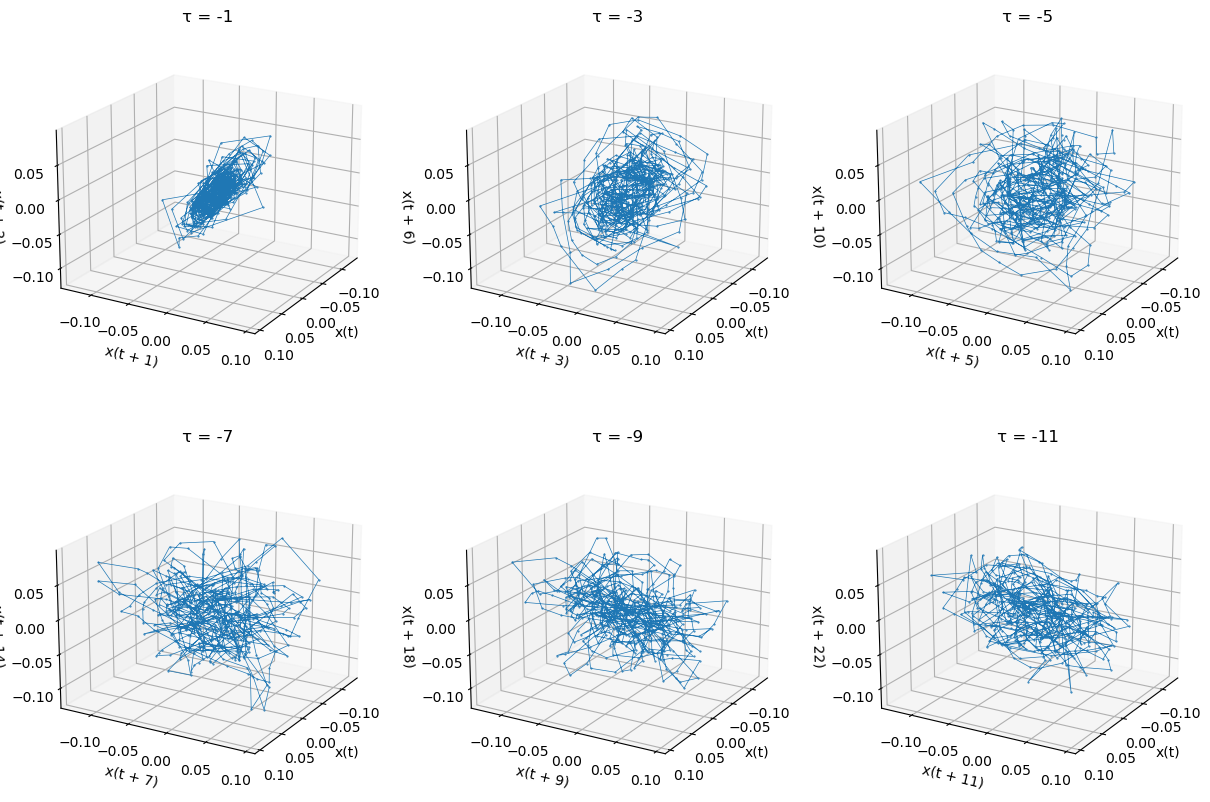

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Sort by time so the embedding respects chronology
df_sorted = df_sd.sort_values('age')
series = df_sorted['d18O'].values

# 2. Parameters
E    = 3
taus = [1, 3, 5, 7, 9, 11]

# 3. Set up figure with 6 3D subplots
fig = plt.figure(figsize=(15, 10))
for idx, tau in enumerate(taus, start=1):
    ax = fig.add_subplot(2, 3, idx, projection='3d')
    
    # 4. Build the embedding: columns [ x(t), x(t+τ), x(t+2τ) ]
    N = len(series) - (E - 1) * tau
    X = np.column_stack([series[j * tau : j * tau + N] for j in range(E)])
    
    # 5. Plot the manifold as a time‐ordered line
    ax.plot(X[:, 0], X[:, 1], X[:, 2], linewidth=0.5, marker='.', markersize=1)

    # set the view angle
    ax.view_init(elev=20, azim=30)
    
    # 6. Labels & titles
    ax.set_title(f'τ = -{tau}')
    ax.set_xlabel('x(t)')
    ax.set_ylabel(f'x(t + {tau})')
    ax.set_zlabel(f'x(t + {2*tau})')

# plt.tight_layout()
plt.show()


Using lib=1 532, pred=1 532


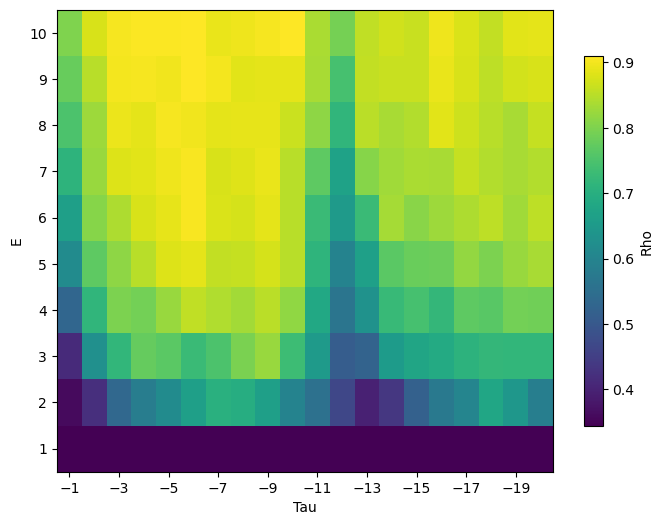

Best E=9, tau=-6 with rho=0.910
Optimal E = 9   Optimal tau = -6


In [4]:
from toolbox import ccm_functions as cf
import importlib
importlib.reload(cf)

best_E, best_tau, rho_matrix = cf.find_optimal_E_tau(
    df_sd   = df_sd,
    df_pre  = df_pre,
    maxE    = 10,
    tau_min  = -20,
    Tp=0,
)
print("Optimal E =", best_E, "  Optimal tau =", best_tau)

In [44]:
df_pre

,age,pre
641,200.0,-0.004658
640,1200.0,-0.001830
639,2200.0,0.001432
638,3200.0,0.005100
637,4200.0,0.008929
...,...,...
4,637200.0,0.010453
3,638200.0,0.014018
2,639200.0,0.016308
1,640200.0,0.017116


In [43]:
df_sd

,age,d18O
641,200.0,-1.086167
640,1200.0,-0.624143
639,2200.0,0.247750
638,3200.0,-0.246556
637,4200.0,-0.802900
...,...,...
4,637200.0,-0.036667
3,638200.0,0.582500
2,639200.0,0.958571
1,640200.0,0.175000


# Processing CO2 and LR04

In [5]:
# # read composite_co2.xlsx from D:\VScode\bipolar_seesaw_CCM\other_data
# df_co2 = pd.read_excel(
#     r"D:\VScode\bipolar_seesaw_CCM\other_data\composite_co2.xlsx", 
#     sheet_name='Sheet2'
# )
# # rename the columns to 'age' and 'co2'
# df_co2.columns = ['age', 'co2']
# # # plot the hist of age idff
# # plt.figure(figsize=(12, 6))
# # plt.hist(np.diff(df_co2['age']), bins=100, color='blue', alpha=0.5)
# # plt.xlabel("Age")

# # plot the df_co2
# plt.figure(figsize=(12, 6))
# plt.plot(df_co2['age'], df_co2['co2'], label='co2', color='blue')
# plt.xlabel("Age")
# plt.ylabel("CO2")
# plt.legend()
# plt.show()


# # create a nw time from 0 to 641200 with a step of 1000
# new_time = np.arange(0, 641200, 1000)
# # interpolate the co2 data to the new time
# new_co2 = np.interp(new_time, df_co2['age'], df_co2['co2'])
# df_co2 = pd.DataFrame({'age': new_time, 'co2': new_co2})



# df_co2["smoothed"] = df_co2["co2"].rolling(window=10, center=True, min_periods=1).mean()
# df_co2["co2"] = df_co2["co2"] - df_co2["smoothed"]



# # plot the df_co2
# plt.figure(figsize=(12, 6))
# plt.plot(df_co2['age'], df_co2['co2'], label='co2', color='blue')
# plt.xlabel("Age")
# plt.ylabel("CO2")
# plt.legend()
# plt.show()

# df_co2['age']=df_co2['age'].values * -1 +641000



# # flip the two dfs upside down
# df_co2 = df_co2.iloc[::-1]
# # reset the index of df_co2
# df_co2 = df_co2.reset_index(drop=True)
# print(df_co2)




# df_lr04= pd.read_excel(
#     r"D:\VScode\bipolar_seesaw_CCM\other_data\lr04.xlsx", 
#     sheet_name='Sheet1'
# )

# df_lr04.columns = ['age', 'lr04']
# # age = age * 1000
# df_lr04['age'] = df_lr04['age'] * 1000

# new_time = np.arange(0, 641200, 1000)
# # interpolate the co2 data to the new time
# new_lr04 = np.interp(new_time, df_lr04['age'], df_lr04['lr04'])
# df_lr04 = pd.DataFrame({'age': new_time, 'lr04': new_lr04})


# df_lr04["smoothed"] = df_lr04["lr04"].rolling(window=10, center=True, min_periods=1).mean()
# df_lr04["lr04"] = df_lr04["lr04"] - df_lr04["smoothed"]


# df_lr04['age']=df_lr04['age'].values * -1 +641000
# # flip the two dfs upside down
# df_lr04 = df_lr04.iloc[::-1]
# # reset the index of df_lr04
# df_lr04 = df_lr04.reset_index(drop=True)

# # crop the first and last 50 rows of df_lr04 and df_co2
# df_lr04 = df_lr04.iloc[50:-50]
# df_co2 = df_co2.iloc[50:-50]


# print(df_lr04)

# # plot the df_lr04
# plt.figure(figsize=(12, 6))
# plt.plot(df_lr04['age'], df_lr04['lr04'], label='lr04', color='blue')
# plt.xlabel("Age")
# plt.ylabel("LR04")
# plt.legend()
# plt.show()


# Pre

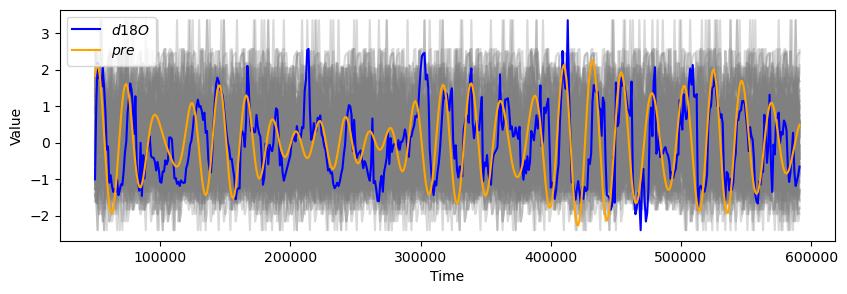

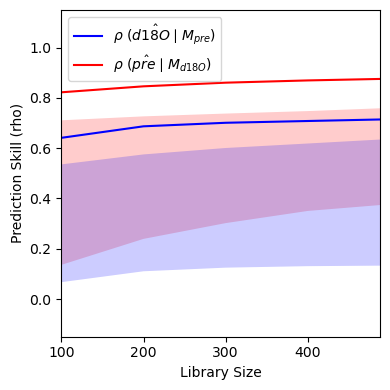

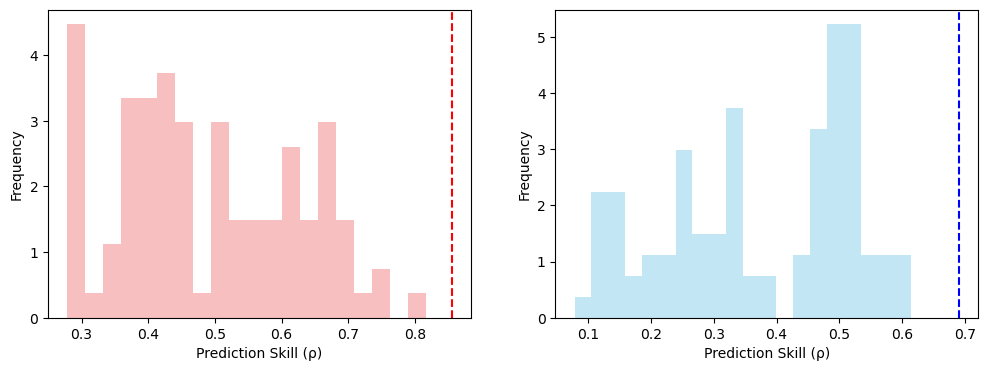

(True, True)


In [6]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v2(
    df_sd, 
    df_pre,
    E=7, 
    tau=-3, 
    n_ran=100, 
    libSizes="100 200 300 400 488",
    Tp=0,
    sample=100,
    random=True,
    uni_dir=False,
    showPlot=True)
print(test_result)

In [8]:
from toolbox import ccm_functions as cf
import importlib
importlib.reload(cf)
 

Tps_list, forward_rhos, reverse_rhos = cf.find_optimal_Tp(
    df_sd      = df_sd,
    df_pre     = df_pre,
    E          = 7,
    tau        = -3,
    libSizes   = "480",
    sample     = 100,
    Tps        = range(-10, 11),
    interactive=True   
)

# d18O pre, sliding window

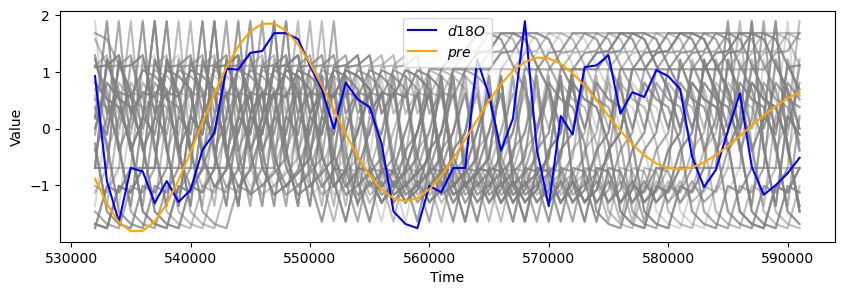

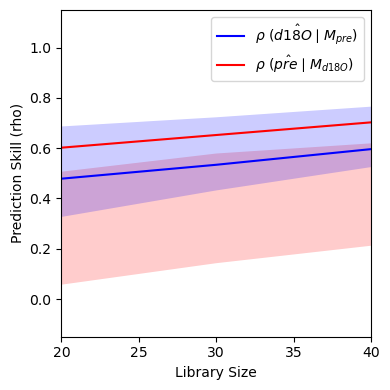

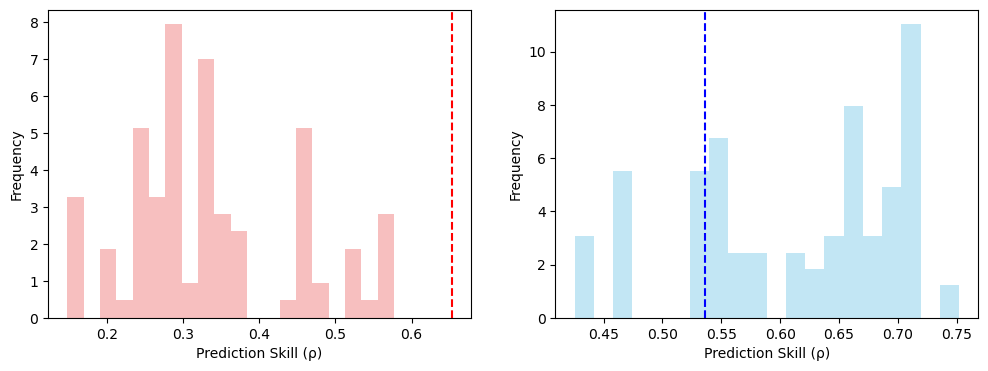

(True, False)


In [9]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)

df_sd_crop = df_sd.copy()
df_pre_crop = df_pre.copy()

# get the last 120 rows of crop
df_sd_crop = df_sd_crop.iloc[-60:]
df_pre_crop = df_pre_crop.iloc[-60:]

ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v2(
    df_sd_crop, 
    df_pre_crop,
    E=5, 
    tau=-4, 
    n_ran=100, 
    libSizes="20 30 40",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)
print(test_result)

CCM windows:   0%|          | 0/99 [00:00<?, ?it/s]

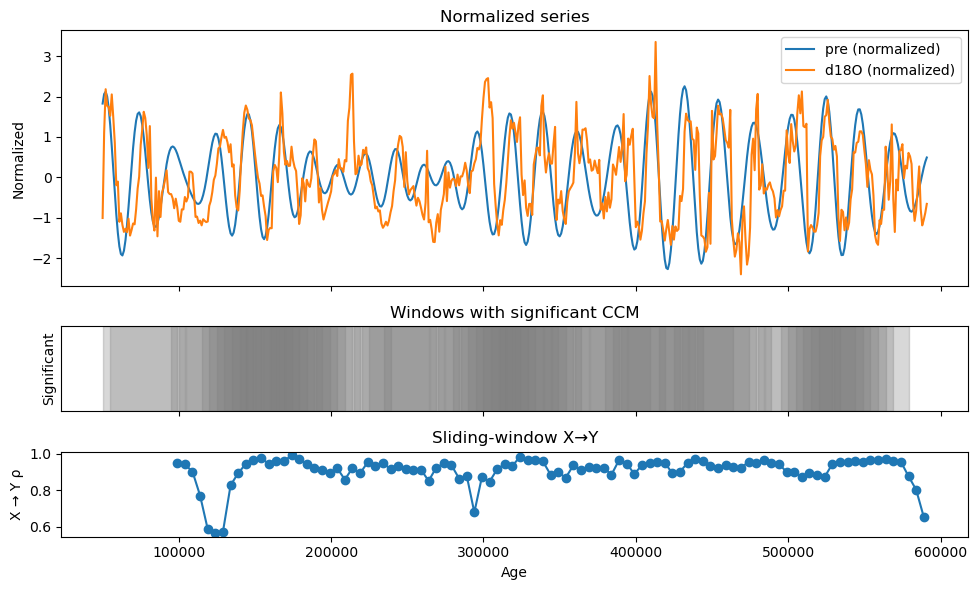

In [4]:
from toolbox import significant_test as st
import importlib
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.auto import tqdm

importlib.reload(st)

# parameters
window_size = 50
step = 5
lib_sizes = "10 30"

# normalize the full series once
pre_norm = (df_pre['pre'] - df_pre['pre'].mean()) / df_pre['pre'].std()
sd_norm  = (df_sd['d18O'] - df_sd['d18O'].mean()) / df_sd['d18O'].std()

# storage
results = []

# how many windows
n_windows = ((len(df_sd) - window_size) // step) + 1

# slide the window, with tqdm progress bar
for start in tqdm(range(0, len(df_sd) - window_size + 1, step),
                  total=n_windows,
                  desc="CCM windows"):
    end = start + window_size
    sd_win  = df_sd.iloc[start:end]
    pre_win = df_pre.iloc[start:end]
    
    # run CCM (plots off)
    ccm_out, ran_ccm_list_xy, test_result = st.ccm_significance_test_v2(
        sd_win,
        pre_win,
        E=7,
        tau=-3,
        n_ran=20,
        libSizes=lib_sizes,
        Tp=0,
        sample=10,
        random=True,
        uni_dir=False,
        showPlot=False
    )
    
    # record window bounds, significance flag, and final X→Y
    window_start = sd_win['age'].iloc[0]
    window_end   = sd_win['age'].iloc[-1]
    sig_flag     = bool(test_result[0])         # first boolean test result
    x_to_y       = ccm_out.iloc[-1]['X:Y']
    
    results.append({
        'start': window_start,
        'end':   window_end,
        'sig':   sig_flag,
        'X→Y':   x_to_y
    })

# build DataFrame
res_df = pd.DataFrame(results)

# --- now plot the 3 rows ---
fig, axes = plt.subplots(
    nrows=3, ncols=1,
    sharex=True,
    figsize=(10, 6),
    gridspec_kw={'height_ratios': [3, 1, 1]}
)

# 1) Top: normalized pre & sd
axes[0].plot(df_pre['age'], pre_norm, label='pre (normalized)')
axes[0].plot(df_sd['age'],  sd_norm,  label='d18O (normalized)')
axes[0].set_ylabel('Normalized')
axes[0].legend(loc='upper right')
axes[0].set_title('Normalized series')

# 2) Middle: vertical spans where sig == True
for _, row in res_df.iterrows():
    if row['sig']:
        axes[1].axvspan(row['start'], row['end'], alpha=0.3, color='gray')
axes[1].set_ylabel('Significant')
axes[1].set_yticks([])  # no y‐axis labels
axes[1].set_title('Windows with significant CCM')

# 3) Bottom: X→Y correlation through time
axes[2].plot(res_df['end'], res_df['X→Y'], marker='o')
axes[2].set_ylabel('X → Y ρ')
axes[2].set_xlabel('Age')
axes[2].set_title('Sliding‐window X→Y')

plt.tight_layout()
plt.show()


# diff d18O

          age  d18O_diff
0     51000.0   0.589400
1     52000.0   0.593667
2     53000.0   0.414143
3     54000.0   0.270625
4     55000.0   0.104667
..        ...        ...
536  587000.0  -0.115000
537  588000.0  -0.002222
538  589000.0   0.061250
539  590000.0   0.028571
540  591000.0  -0.075000

[541 rows x 2 columns]
          age       pre
0     51000.0  0.045110
1     52000.0  0.046396
2     53000.0  0.043729
3     54000.0  0.037537
4     55000.0  0.028268
..        ...       ...
536  587000.0 -0.001846
537  588000.0  0.001931
538  589000.0  0.005416
539  590000.0  0.008504
540  591000.0  0.010842

[541 rows x 2 columns]


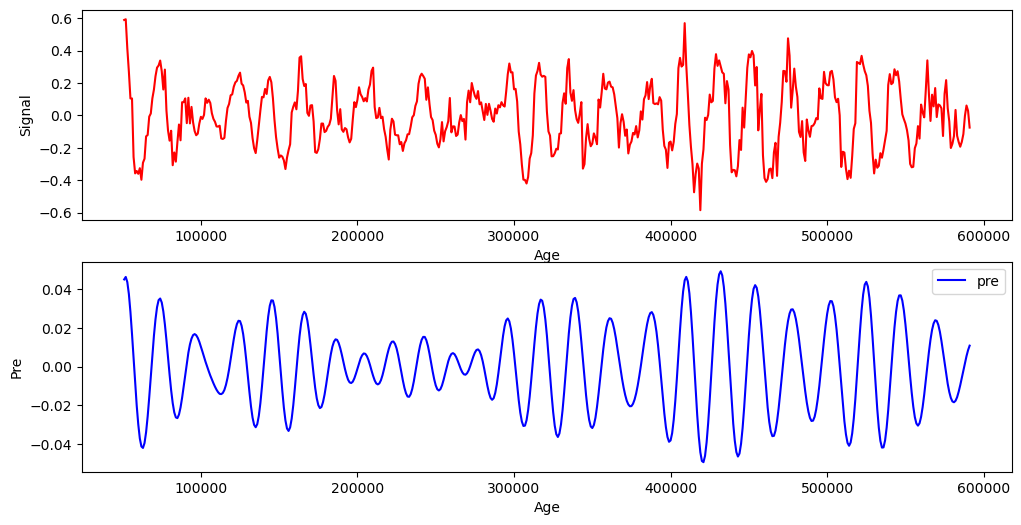

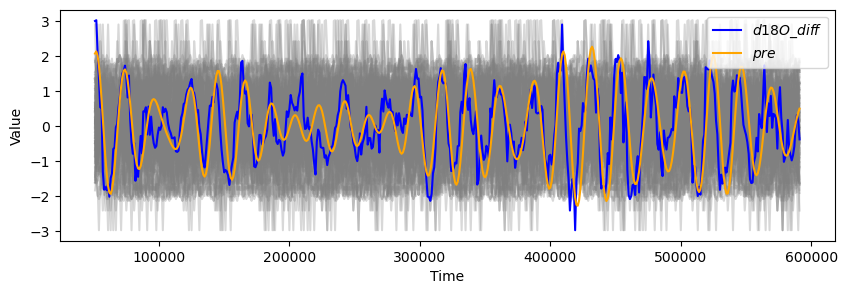

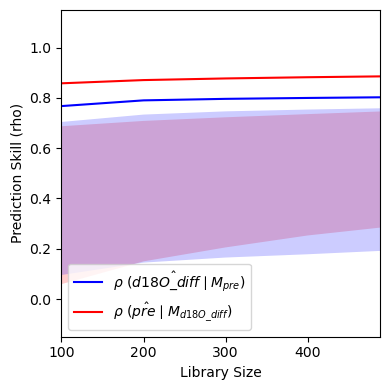

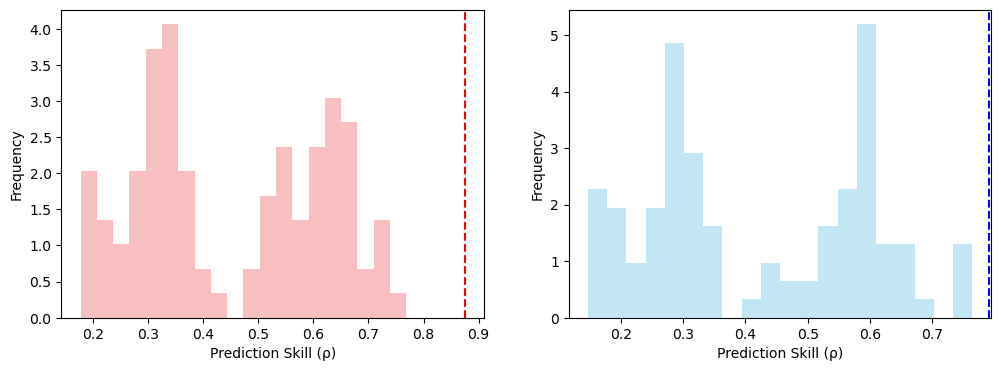

(True, True)


In [9]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)

df_sd_diff = df_sd.copy()
df_sd_diff['d18O_diff'] = df_sd_diff['d18O'].diff()
# drop column d18O
df_sd_diff = df_sd_diff.drop(columns=['d18O'])
df_sd_diff = df_sd_diff.dropna()
# reset index
df_sd_diff = df_sd_diff.reset_index(drop=True)

# smooth the df_sd_diff with a rolling mean of 10
df_sd_diff["d18O_diff"] = df_sd_diff["d18O_diff"].rolling(window=10, center=True, min_periods=1).mean()
# dropna
df_sd_diff = df_sd_diff.dropna()
# reset index
df_sd_diff = df_sd_diff.reset_index(drop=True)

# drop a row in df_pre to match the length of df_sd_diff
df_pre_crop = df_pre.copy()
df_pre_crop = df_pre_crop.iloc[1:].reset_index(drop=True)

print(df_sd_diff)
print(df_pre_crop)

# plot df_sd_diff and df_pre_crop in 2 by 1 subplots
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df_sd_diff['age'], df_sd_diff['d18O_diff'], label='signal', color='red')
plt.xlabel("Age")
plt.ylabel("Signal")
plt.subplot(2, 1, 2)
plt.plot(df_pre_crop['age'], df_pre_crop['pre'], label='pre', color='blue')
plt.xlabel("Age")
plt.ylabel("Pre")
plt.legend()


ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v2(
    df_sd_diff, 
    df_pre_crop,
    E=7, 
    tau=-3, 
    n_ran=100, 
    libSizes="100 200 300 400 488",
    Tp=0,
    sample=100,
    random=True,
    uni_dir=False,
    showPlot=True)
print(test_result)

In [4]:
print(ccm_out)

   LibSize       X:Y       Y:X
0    100.0  0.370175  0.155976
1    200.0  0.383744  0.171019
2    300.0  0.385369  0.168037
3    400.0  0.385406  0.171030
4    488.0  0.384049  0.168172


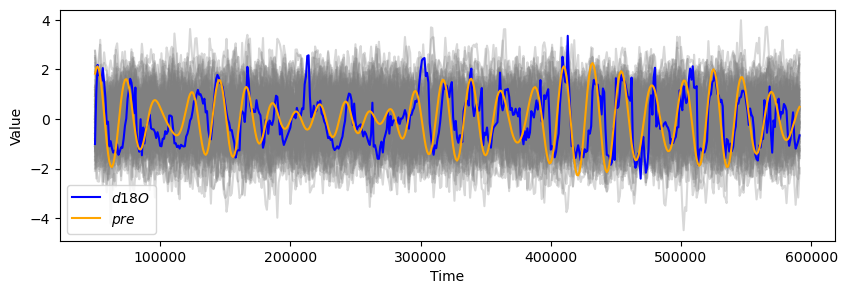

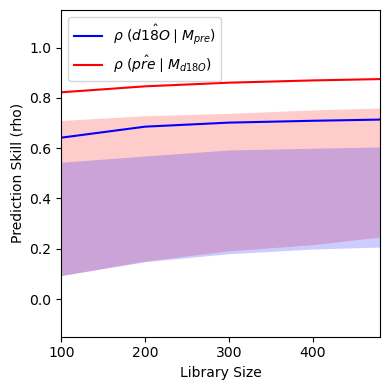

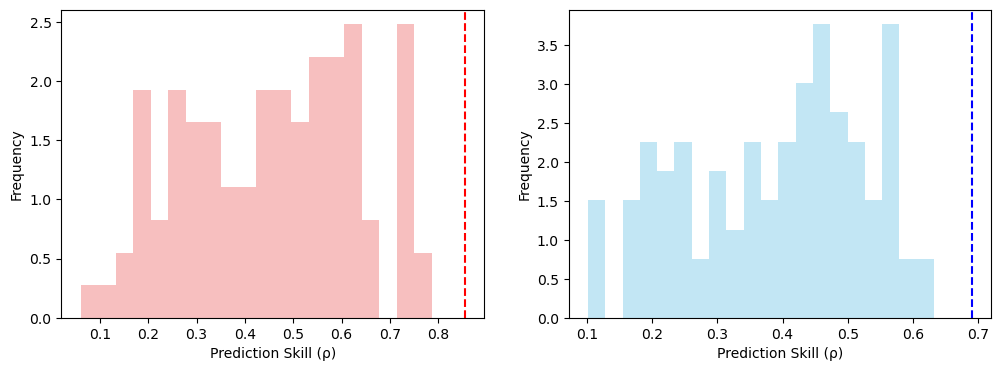

(True, True)


In [7]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v3(
    df_sd, 
    df_pre,
    E=7, 
    tau=-3, 
    n_ran=100, 
    libSizes="100 200 300 400 480",
    Tp=0,
    sample=100,
    random=True,
    uni_dir=False,
    showPlot=True)
print(test_result)